# User Experience Analysis

In [1]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '2'
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.connection import Connector

In [3]:
# instance of the class
connector=Connector()

In [4]:
xdr_data=connector.load_table_to_dataframe('xdr_data_cleaned')

SQLAlchemy connection is disposed


In [5]:
from script.user_experience_analyzer import ExperienceAnalyzer

In [6]:
analyzer= ExperienceAnalyzer()

### User Data Aggregate

In [7]:
user_aggregate=analyzer.user_aggregate(xdr_data)

   MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0   3.360100e+10                 7.149236e+06                259619.136881   
1   3.360100e+10                 7.149236e+06                259619.136881   
2   3.360100e+10                 7.149236e+06                259619.136881   
3   3.360101e+10                 1.066000e+03                259619.136881   
4   3.360101e+10                 8.249433e+06                140410.568441   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  Avg RTT DL (ms)  \
0                     37.0                  39.0000        46.000000   
1                     48.0                  51.0000        30.000000   
2                     48.0                  49.0000        78.317083   
3                    204.0                  44.0000        69.000000   
4                  20197.5                 586.5232        57.000000   

   Avg RTT UL (ms)                    Handset Type  \
0         0.000000  Huawei P20 Lite Huawei N

### 10 of the top, bottom, and most frequent

In [8]:
analyzer.tcp_rtt_throughput_analysis(user_aggregate)

{'Top TCP':        MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
 46972   3.366212e+10                  335139152.0   
 23286   3.365011e+10                  344820925.0   
 31190   3.365849e+10                  348062089.0   
 58826   3.366519e+10                  353206167.0   
 67949   3.366815e+10                  351440959.0   
 64825   3.366714e+10                  345341458.0   
 16424   3.363184e+10                  339178976.0   
 38928   3.366021e+10                  330587756.0   
 39363   3.366031e+10                  333378769.0   
 39595   3.366036e+10                  329500215.0   
 
        TCP UL Retrans. Vol (Bytes)  Avg Bearer TP DL (kbps)  \
 46972                   33628302.0                  44205.0   
 23286                   14460682.0                  59510.0   
 31190                    7572826.0                  41210.0   
 58826                       1376.0                   5085.0   
 67949                     183710.0                  61441.0   
 64825   

### Distribution of average throughput and TCP retransmission by handset type

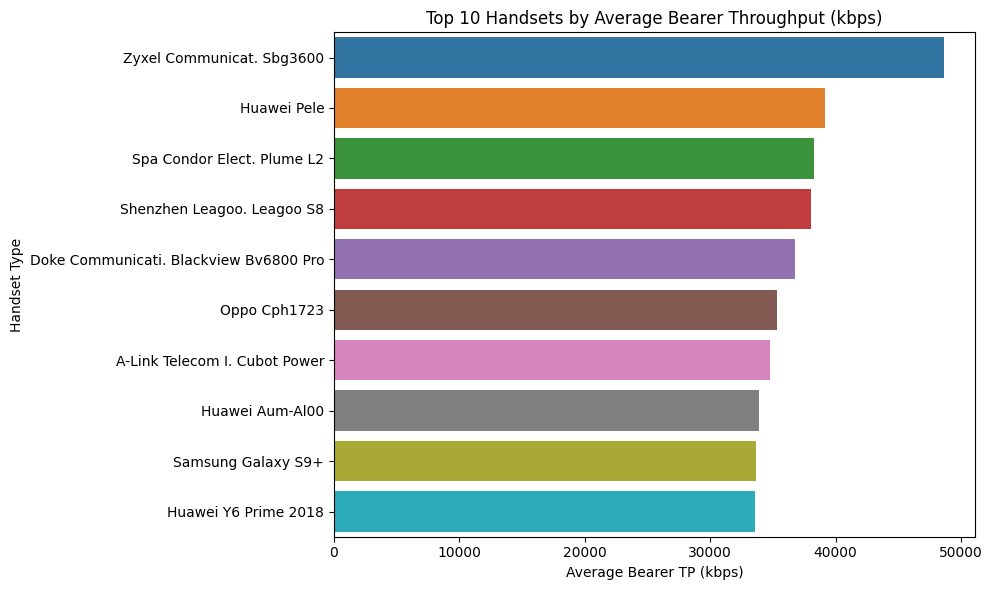

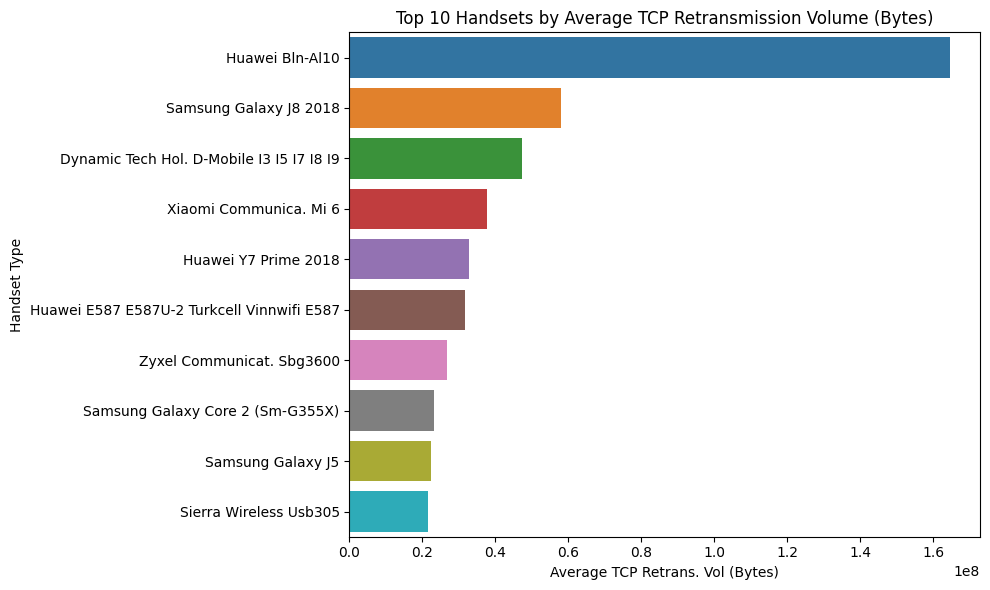

In [9]:
analyzer.throughput_tcp_handset_analysis(user_aggregate)

### K-Means clustering for user segmentation

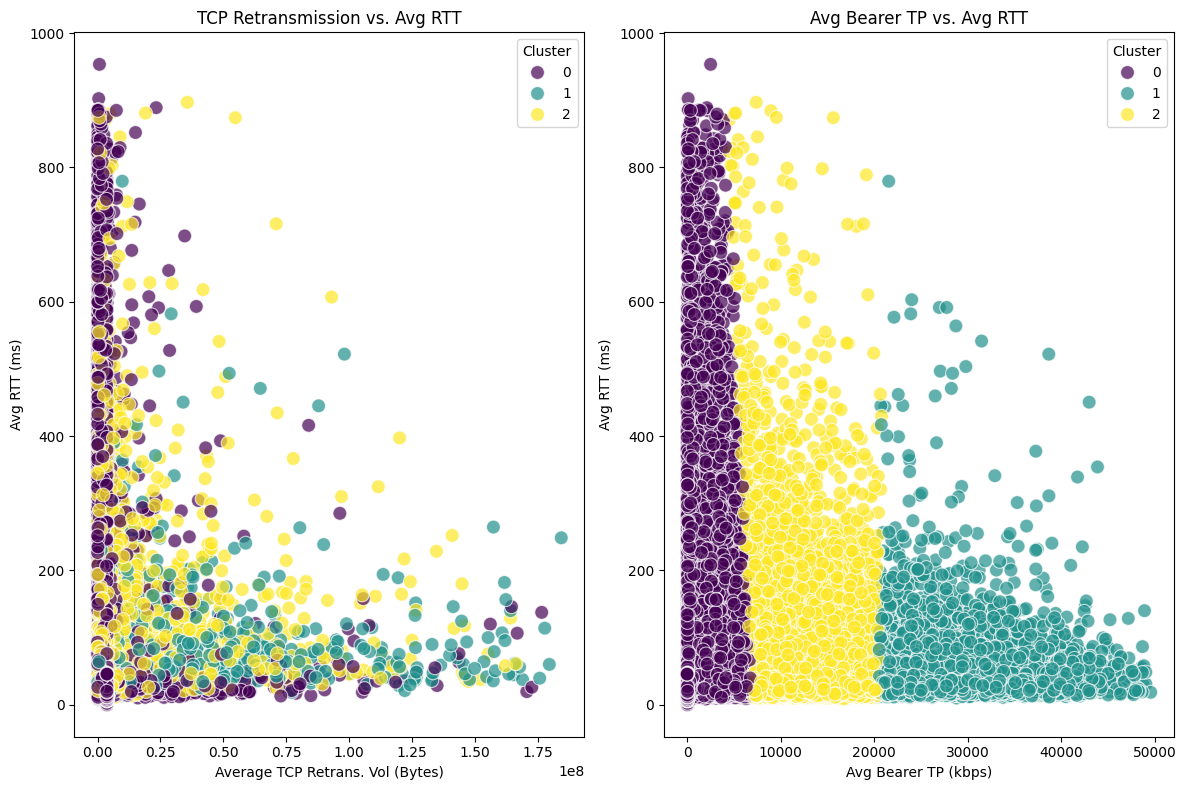

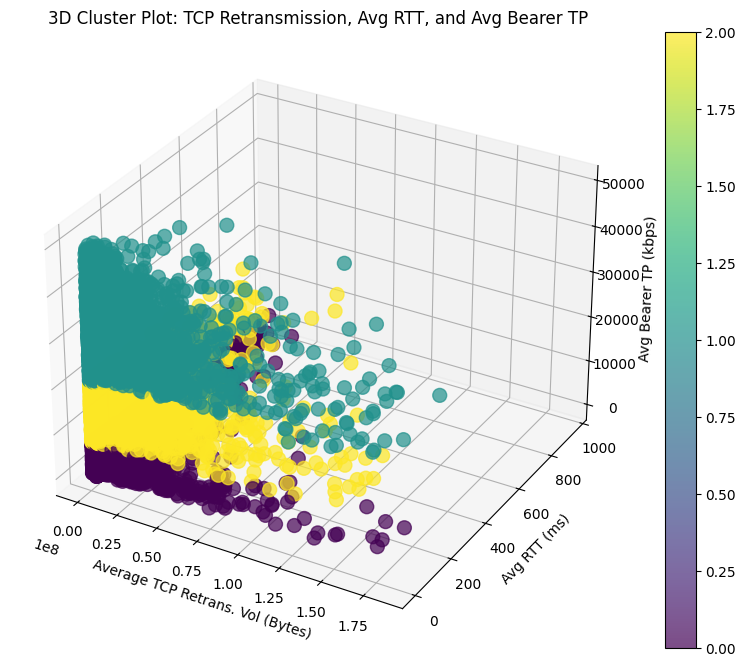

In [10]:
analyzer.kmeans_clustering(user_aggregate)